In [1]:
import pandas as pd

In [11]:
!pwd

/Users/manaranjan/Documents/Work/Data Science/Python/2Days Program/data/HP Demo 20


In [12]:
!ls -al

total 240
drwxr-xr-x   11 manaranjan  staff    374 Mar 30 14:33 .
drwxr-xr-x  109 manaranjan  staff   3706 Mar 30 10:45 ..
-rw-r--r--@   1 manaranjan  staff   6148 Mar 30 10:46 .DS_Store
drwxr-xr-x    5 manaranjan  staff    170 Mar 30 14:19 .ipynb_checkpoints
-rw-r--r--    1 manaranjan  staff  10932 Mar 30 14:33 Cars Performance 1.0.ipynb
-rw-r--r--    1 manaranjan  staff   1600 Mar 30 11:10 My First Program 1.0.ipynb
-rw-r--r--    1 manaranjan  staff  72318 Mar 30 13:12 Titanic Exploration 1.0.ipynb
-rw-r--r--@   1 manaranjan  staff     83 Mar 30 13:10 age.csv
-rw-r--r--@   1 manaranjan  staff  10157 Mar 30 12:45 age.png
drwxr-xr-x   18 manaranjan  staff    612 Oct 14 12:21 data
-rw-r--r--    1 manaranjan  staff   8075 Mar 30 12:51 survived.png


In [2]:
auto_df = pd.read_csv( "./data/Auto.csv" )

In [3]:
auto_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [6]:
auto_df[-auto_df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


### Data Clean up

In [9]:
auto_df['horsepower'] = pd.to_numeric( auto_df['horsepower'],
                                       errors = 'coerce')

In [10]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


## Unique Values

In [13]:
auto_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [15]:
auto_df.origin.unique()

array([1, 3, 2])

## Insights

### Which origin (A/E/J) were manufacturing cars with higher fuel efficiency?

#### Comparison between American and Japanese

In [17]:
american_cars = auto_df[auto_df.origin == 1]
european_cars = auto_df[auto_df.origin == 2]
japanese_cars = auto_df[auto_df.origin == 3]

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

- Overlapped Distribtion plot can be used to compare one numerican with one categorical vaariable.

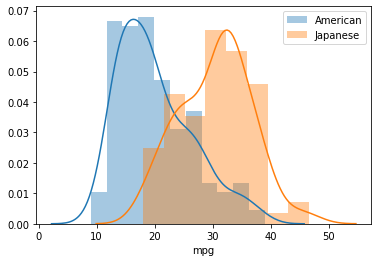

In [24]:
sn.distplot( american_cars['mpg'], label = 'American' )
sn.distplot( japanese_cars['mpg'], label = 'Japanese' );
plt.legend();

### Which origin (A/E/J) were manufacturing cars with more power?

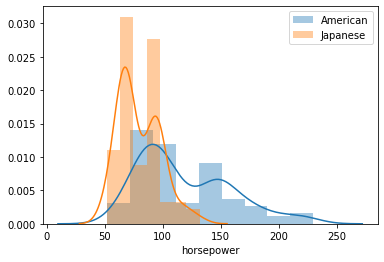

In [26]:
sn.distplot( american_cars['horsepower'].dropna(), label = 'American' )
sn.distplot( japanese_cars['horsepower'].dropna(), label = 'Japanese' );
plt.legend();

### Scatter Plot

Compare two numerical variables

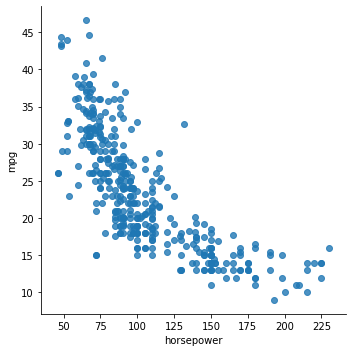

In [33]:
sn.lmplot( data = auto_df,
           x = 'horsepower',
           y = 'mpg',
           fit_reg = False );

### Finding Correlation between Variables

mpg, weight, acceleration, displcement, horsepower

In [35]:
auto_df[['mpg', 
         'weight', 
         'acceleration', 
         'displacement', 
         'horsepower']].corr()

,mpg,weight,acceleration,displacement,horsepower
mpg,1.000000,-0.831739,0.422297,-0.804443,-0.778427
weight,-0.831739,1.000000,-0.419502,0.933104,0.864538
acceleration,0.422297,-0.419502,1.000000,-0.544162,-0.689196
displacement,-0.804443,0.933104,-0.544162,1.000000,0.897257
horsepower,-0.778427,0.864538,-0.689196,0.897257,1.000000


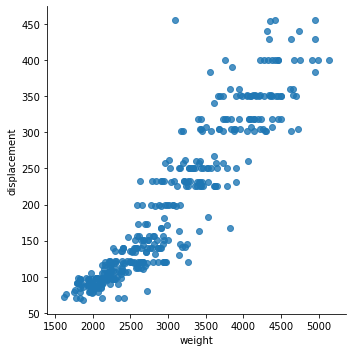

In [37]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'displacement',
           fit_reg = False );

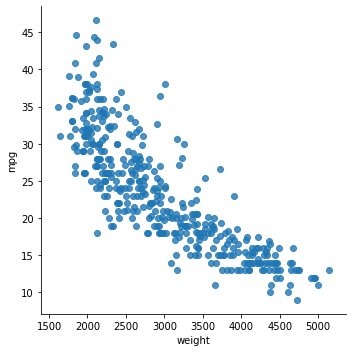

In [38]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'mpg',
           fit_reg = False );

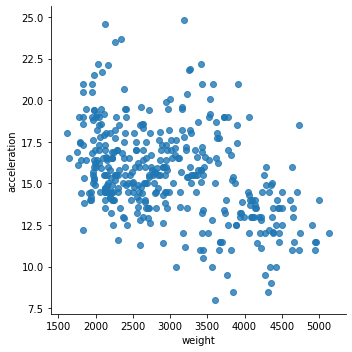

In [39]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'acceleration',
           fit_reg = False );

In [41]:
corr_mat = auto_df[['mpg', 
                    'weight', 
                    'acceleration', 
                    'displacement', 
                    'horsepower']].corr()

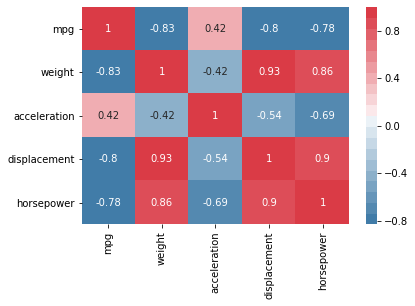

In [48]:
sn.heatmap( corr_mat,
            annot = True,
            cmap = sn.diverging_palette( 240, 10, n = 20 ) );

### Basic Statistics

In [49]:
american_cars.mpg.mean()

20.071774193548382

In [50]:
japanese_cars.mpg.mean()

30.450632911392397

In [51]:
american_cars.mpg.std()

6.413145160339849

In [52]:
japanese_cars.mpg.std()

6.090048069738324

In [53]:
from scipy import stats

In [54]:
stats.norm.interval( 0.7,
                     american_cars.mpg.mean(),
                     american_cars.mpg.std() )

(13.424976417701657, 26.718571969395107)

In [55]:
stats.norm.interval( 0.7,
                     japanese_cars.mpg.mean(),
                     japanese_cars.mpg.std() )

(24.138703748293395, 36.7625620744914)